In [41]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as kurtosis

In [42]:
np.random.seed(42)

In [43]:
# heavy tailed feature (higgh kurtosis )

x_heavy = np.random.standard_t(df=2,size=2000)

# normal feature for comparison 
x_normal = np.random.normal(0,1,2000)


In [44]:
# Target variable (nonlinear + noise)
y= 3*x_heavy + np.random.normal(0,2,2000)

In [45]:
df = pd.DataFrame({
    "heavy_feature": x_heavy,
    "normal_feature": x_normal,
    "target": y
}) 

In [46]:
df.head()

,heavy_feature,normal_feature,target
0,0.432868,-1.840078,1.171457
1,-0.144707,-0.032281,-3.335976
2,-0.957214,0.640543,-2.720490
3,-0.165097,0.123078,1.602437
4,10.950053,-0.113128,32.791726


<Axes: xlabel='heavy_feature', ylabel='Count'>

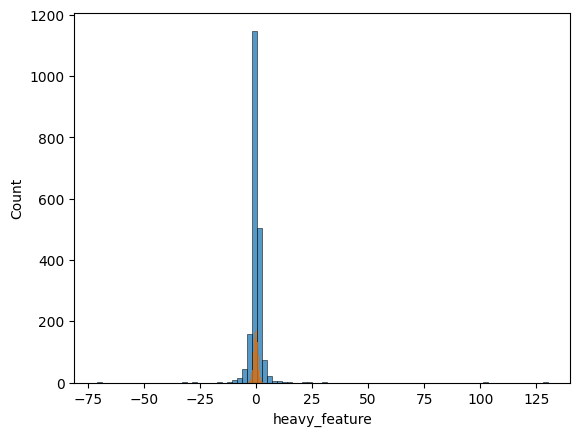

In [47]:

sns.histplot(data=df,x=df["heavy_feature"])
sns.histplot(data=df,x=df["normal_feature"])

In [48]:
kur_heavy = df["heavy_feature"].kurtosis()

kur_normal = df["normal_feature"].kurtosis()

print(kur_heavy, kur_normal)

397.6624444266271 0.07042287417156512


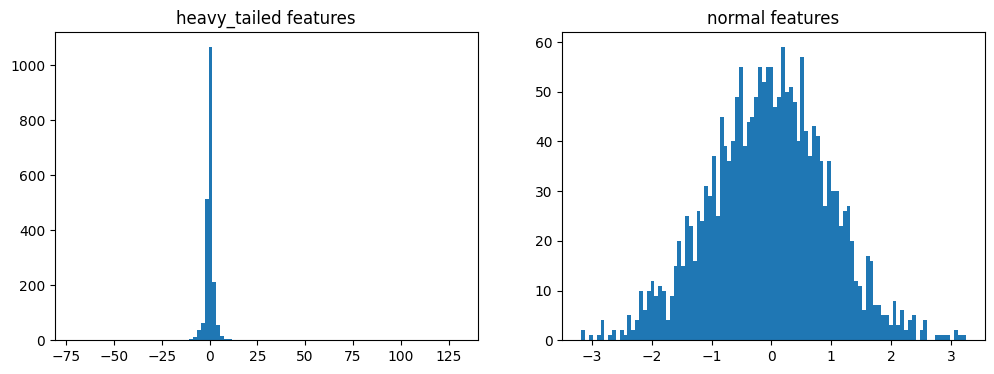

In [49]:
fig , ax = plt.subplots(1,2,figsize=(12,4))

ax[0].hist(df["heavy_feature"], bins=100)
ax[0].set_title("heavy_tailed features")

ax[1].hist(df["normal_feature"], bins=100)
ax[1].set_title("normal features")

plt.show()

In [50]:
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error



In [51]:
x = df[["heavy_feature","normal_feature"]]

y = df[["target"]]

x_train ,x_test,y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [52]:
model = LinearRegression()

model.fit(x_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [53]:
y_pred = model.predict(x_test)

In [54]:
error = mean_squared_error(y_test,y_pred)
error

# 3.968458916035362

3.968458916035362

In [55]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method = "yeo-johnson")

In [56]:
x_trans = pt.fit_transform(x)

In [57]:
print("the kurtosis after tansform:")
print("hevy_features:",
x_trans[:,0].kurtosis())

print("normal_features:",
x_trans[:,1].kurtosis())

the kurtosis after tansform:


AttributeError: 'numpy.ndarray' object has no attribute 'kurtosis'

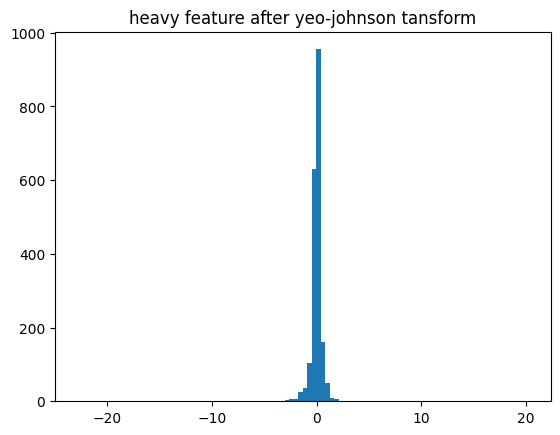

In [ ]:
plt.hist(x_trans[:,0],bins=100)
plt.title("heavy feature after yeo-johnson tansform")
plt.show()

In [60]:
x_train , x_test , y_train, y_test = train_test_split(
    x_trans, y, test_size= 0.2, random_state=42
)
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

In [62]:
error = mean_squared_error(y_test,y_pred)
error

4.7826059222085355